In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4_btms_sizing_sensitivity'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

load results 

In [2]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df)
    sizing_results.append(sizing_results_one_param_combination)
    # recognize parameters from a_b_c_factor.csv file
    df = pd.read_csv(os.path.join(sizing_results_path, folder, 'a_b_c_factor.csv'))
    sizing_results_params.append(df)

In [3]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [4]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


In [5]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df, timestep), index=[df.name]))
    stats_per_param_combination_list.append(stats)

In [6]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [7]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b,cost_c,cost_total,share_cost_a,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,293.820264,10.366081,25.091318,5.780339,41.237738,0.238752,0.618776,0.142472,683.684094,1.843184,1.938834,0.879970,0.992976,20.763962
std,138.168865,7.787580,12.446179,2.886805,22.494362,0.031154,0.025452,0.007424,441.610667,0.906512,0.493533,0.080120,0.047210,16.384284
min,43.701893,0.653385,1.929722,0.439680,3.022787,0.210443,0.428341,0.097080,44.000000,0.437926,1.000000,0.468542,0.602497,4.035926
25%,193.796912,5.655302,15.616240,3.591919,24.827583,0.225501,0.615296,0.140863,382.416667,1.235758,1.556322,0.845350,1.000000,11.441866
50%,278.095766,9.637511,25.496990,5.808849,41.188706,0.233645,0.622374,0.142734,651.916667,1.668766,1.910094,0.886528,1.000000,17.080864
75%,396.050626,12.889421,32.798105,7.524769,53.123992,0.242508,0.630467,0.144143,878.083333,2.239896,2.248761,0.935030,1.000000,23.910017
max,839.148784,49.315125,70.948321,17.000054,137.263444,0.474580,0.638392,0.180198,2957.166667,6.819215,3.680815,0.993225,1.000000,149.952500


In [8]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b,cost_c,cost_total,share_cost_a,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,157.000000,157.000000,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000,1.570000e+02
mean,3.856357e+01,9.506579,2.102447e+00,4.866903e-01,12.095716,0.789159,1.712592e-01,3.958188e-02,683.684094,6.766195,2.035312,1.177808e-01,0.135158,3.617439e+00
std,3.594655e+01,3.088646,2.025833e+00,4.758281e-01,3.565455,0.229578,1.863018e-01,4.343926e-02,441.610667,10.517981,1.993804,2.156180e-01,0.191379,1.522973e+01
min,1.084912e-07,0.065339,4.716983e-08,1.077322e-08,2.434740,0.026836,4.782497e-09,1.092285e-09,44.000000,0.720181,1.000000,1.603413e-09,0.027774,5.816199e-10
25%,2.980690e-05,9.863013,3.376499e-06,7.719181e-07,9.863014,0.685402,3.423394e-07,7.826391e-08,382.416667,2.406231,1.013254,2.379489e-07,0.063098,1.959810e-07
50%,3.572811e+01,9.863014,1.729769e+00,3.949553e-01,11.357342,0.828462,1.397061e-01,3.183227e-02,651.916667,4.280184,1.295858,5.379285e-02,0.096207,9.999997e-01
75%,6.637853e+01,9.863014,3.446688e+00,8.028596e-01,14.017223,1.000000,2.562212e-01,5.915348e-02,878.083333,6.292121,1.771644,1.065233e-01,0.124664,1.000000e+00
max,1.675783e+02,19.726028,8.295514e+00,2.307722e+00,29.920599,1.000000,7.925780e-01,1.987357e-01,2957.166667,60.000000,12.445062,9.932248e-01,1.000000,1.499525e+02


Text(0.5, 1.0, 'btms peak to grid ratio for each a value')

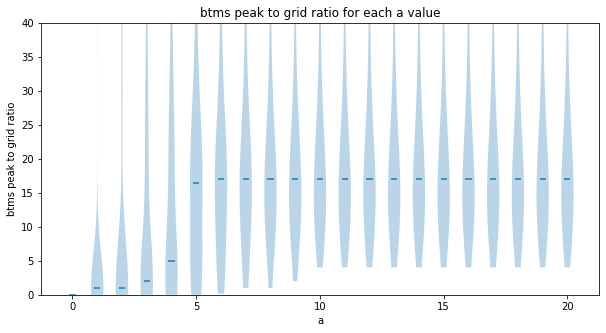

In [38]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(10, 5))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


In [9]:
test = stats_per_param_combination.loc[:, 'c_rate'].unstack()
test

,1008,1013,1033,1034,1035,1039,104,1042,1049,1055,...,918,92,921,928,945,972,978,985,992,999
0.0,11.985785,1.785993,16.846301,7.328761,22.921442,27.182753,6.623302,2.784231,3.102574,6.201148,...,2.197713,6.728206,5.766699,10.041426,2.404100,4.753787,10.660090,10.053147,29.576760,22.499256
1.0,11.214953,2.217147,15.319149,7.045010,6.206896,1.297810,4.485907,2.991043,1.738108,1.750430,...,5.960265,2.691684,4.172882,5.557491,3.116792,3.517091,3.839210,4.332129,21.176471,59.999930
2.0,11.214953,1.588630,4.887441,2.899397,3.236672,1.103520,4.398307,2.991042,1.655126,1.839994,...,2.602434,1.062458,3.955444,5.465293,3.086202,3.453572,3.693618,4.328298,21.176470,1.376612
3.0,3.582329,1.370691,3.295970,2.102080,2.275046,1.085496,4.158262,2.991042,1.286265,1.482195,...,2.385459,1.399848,3.686540,5.362351,2.808852,2.997997,1.846452,1.910772,3.892331,1.234865
4.0,3.111333,1.738995,3.295970,2.102080,2.275046,1.085496,3.651947,2.991042,1.286265,1.482195,...,2.202068,1.247325,1.876646,5.105217,1.686769,1.774794,1.750324,1.910772,3.509501,1.235758
5.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.447041,2.991042,1.286265,1.482195,...,1.351099,1.185302,1.437376,2.457551,1.581200,1.735630,1.264639,1.910772,2.232518,1.235758
6.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.410106,2.991042,1.286265,1.482195,...,1.351099,1.042967,1.437374,1.917828,1.672018,1.561439,1.264639,1.910772,2.232518,1.235758
7.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.046683,2.991042,1.286265,1.482195,...,1.351099,1.042967,1.437374,1.917828,1.319032,1.269526,1.264639,1.910772,2.232518,1.235758
8.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.046683,2.991042,1.286265,1.482195,...,1.351099,1.042968,1.437374,1.917828,1.319032,1.269526,1.264639,1.910772,2.232518,1.235758
9.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.046683,2.991042,1.286265,1.482195,...,1.351099,1.042968,1.437374,1.917828,1.319032,1.269526,1.264639,1.910772,2.232518,1.235758


In [10]:
stats_per_param_combination.loc[:, 'btms_ratio'].groupby(level=0).quantile(0.875)

0.0     8.376058e-09
1.0     2.208904e-01
2.0     9.564632e-01
3.0     9.564632e-01
4.0     9.564632e-01
5.0     9.564632e-01
6.0     9.564632e-01
7.0     9.564632e-01
8.0     9.564632e-01
9.0     9.564632e-01
10.0    9.564632e-01
11.0    9.564632e-01
12.0    9.564632e-01
13.0    9.564632e-01
14.0    9.564632e-01
15.0    9.564632e-01
16.0    9.564632e-01
17.0    9.564632e-01
18.0    9.564632e-01
19.0    9.564632e-01
20.0    9.564632e-01
Name: btms_ratio, dtype: float64

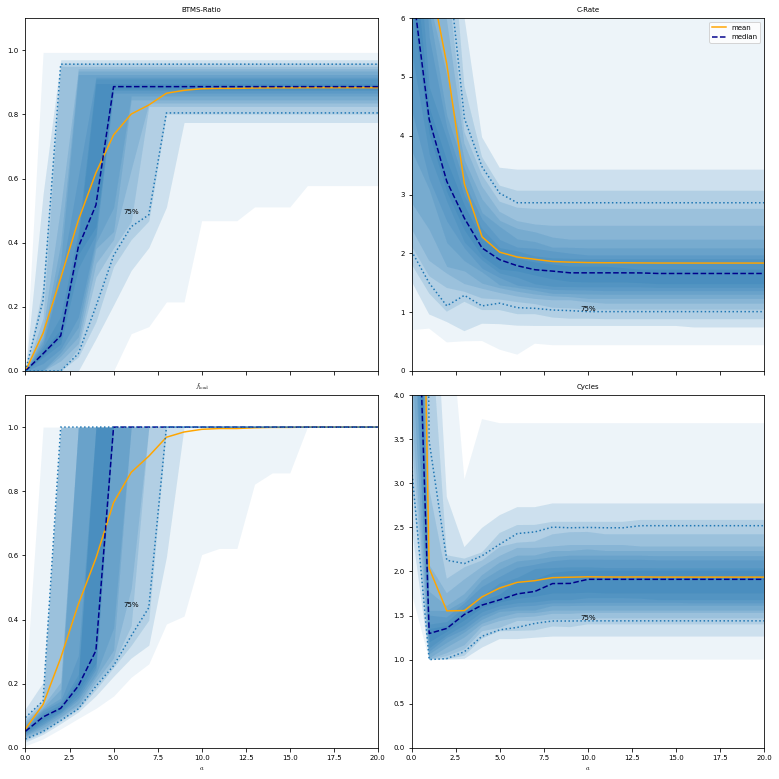

In [41]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =3
fig, ax_arr = plt.subplots(2, 2, figsize=(zoom*plotSizeX, zoom*plotSizeX), sharex=True, sharey=False)
ax = ax_arr.flatten()
pltSettings()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 6
    elif column == 'btms_ratio':
        x = 6
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[0], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[1], 'c_rate', alpha)
plot_mean_median_color_area(ax[2], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
           
# ax0
ax[0].set_ylim(0, 1.1)
ax[0].set_title('BTMS-Ratio', fontsize = 7)
# ax1
ax[1].set_ylim(0, 6)
ax[1].set_title('C-Rate', fontsize = 7)
# plot legend with rectangular shape
ax[1].legend(loc = 'upper right', fontsize = 7)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[2].set_ylim(0, 1.1)
ax[2].set_title(r'$f_\mathrm{load}$', fontsize = 7)
ax[2].set_xlabel(r'$a$')
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles', fontsize = 7)
ax[3].set_xlabel(r'$a$')

fig.tight_layout()
